# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission.csv')

In [ ]:
df_data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
r,c=df_data.shape
print(f"Number of rows:{r}\nNumber of columns:{c}")

Number of rows:4324
Number of columns:9


In [ ]:
column_name=[i for i in df_data.columns]
print(f"Column Names in data {column_name}")

Column Names in data ['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price', 'Mission_Status']


In [ ]:
print(f"IS there any NAN Values:{df_data.isna().values.any()}")
print(f"IS there any Duplicate Values:{df_data.duplicated().values.any()}")

IS there any NAN Values:True
IS there any Duplicate Values:False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [6]:
del df_data['Unnamed: 0.1']
del df_data['Unnamed: 0']

## Descriptive Statistics

In [ ]:
descriptive_statistics=df_data.describe()
descriptive_statistics

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [ ]:
print(f"The Descriptive Statistics of Data is\n{descriptive_statistics}")

The Descriptive Statistics of Data is
       Organisation                                    Location  \
count          4324                                        4324   
unique           56                                         137   
top       RVSN USSR  Site 31/6, Baikonur Cosmodrome, Kazakhstan   
freq           1777                                         235   

                              Date                               Detail  \
count                         4324                                 4324   
unique                        4319                                 4278   
top     Wed Nov 05, 2008 00:15 UTC  Cosmos-3MRB (65MRB) | BOR-5 Shuttle   
freq                             2                                    6   

        Rocket_Status  Price Mission_Status  
count            4324    964           4324  
unique              2     56              4  
top     StatusRetired  450.0        Success  
freq             3534    136           3879  


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
no_of=df_data["Organisation"].value_counts()
no_of

,count
Organisation,
RVSN USSR,1777
Arianespace,279
CASC,251
General Dynamics,251
NASA,203
VKS RF,201
US Air Force,161
ULA,140
Boeing,136


In [ ]:
fig=px.pie(no_of,labels=no_of.index,values=no_of.values,hover_name=no_of.index,width=1000, height=1000)
fig.show()

In [ ]:
fig=px.bar(no_of,x=no_of.index,y=no_of.values,hover_name=no_of.index)

fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [ ]:
Rocket_Status=df_data['Rocket_Status'].value_counts()
Rocket_Status

,count
Rocket_Status,
StatusRetired,3534
StatusActive,790


In [ ]:
print(f"No of Rockets are  active {Rocket_Status[0]}\nNo of Rockets are  retired {Rocket_Status[1]}")

No of Rockets are  active 3534
No of Rockets are  retired 790


<ipython-input-273-75439a498641>:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
suc_fail=df_data['Mission_Status'].value_counts()
suc_fail

,count
Mission_Status,
Success,3879
Failure,339
Partial Failure,102
Prelaunch Failure,4


In [ ]:
print(f"Number of Mission Successfull {suc_fail[0]}\nNumber of Mission Failed {suc_fail[1]}")

Number of Mission Successfull 3879
Number of Mission Failed 339


<ipython-input-275-5024c86f4f91>:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

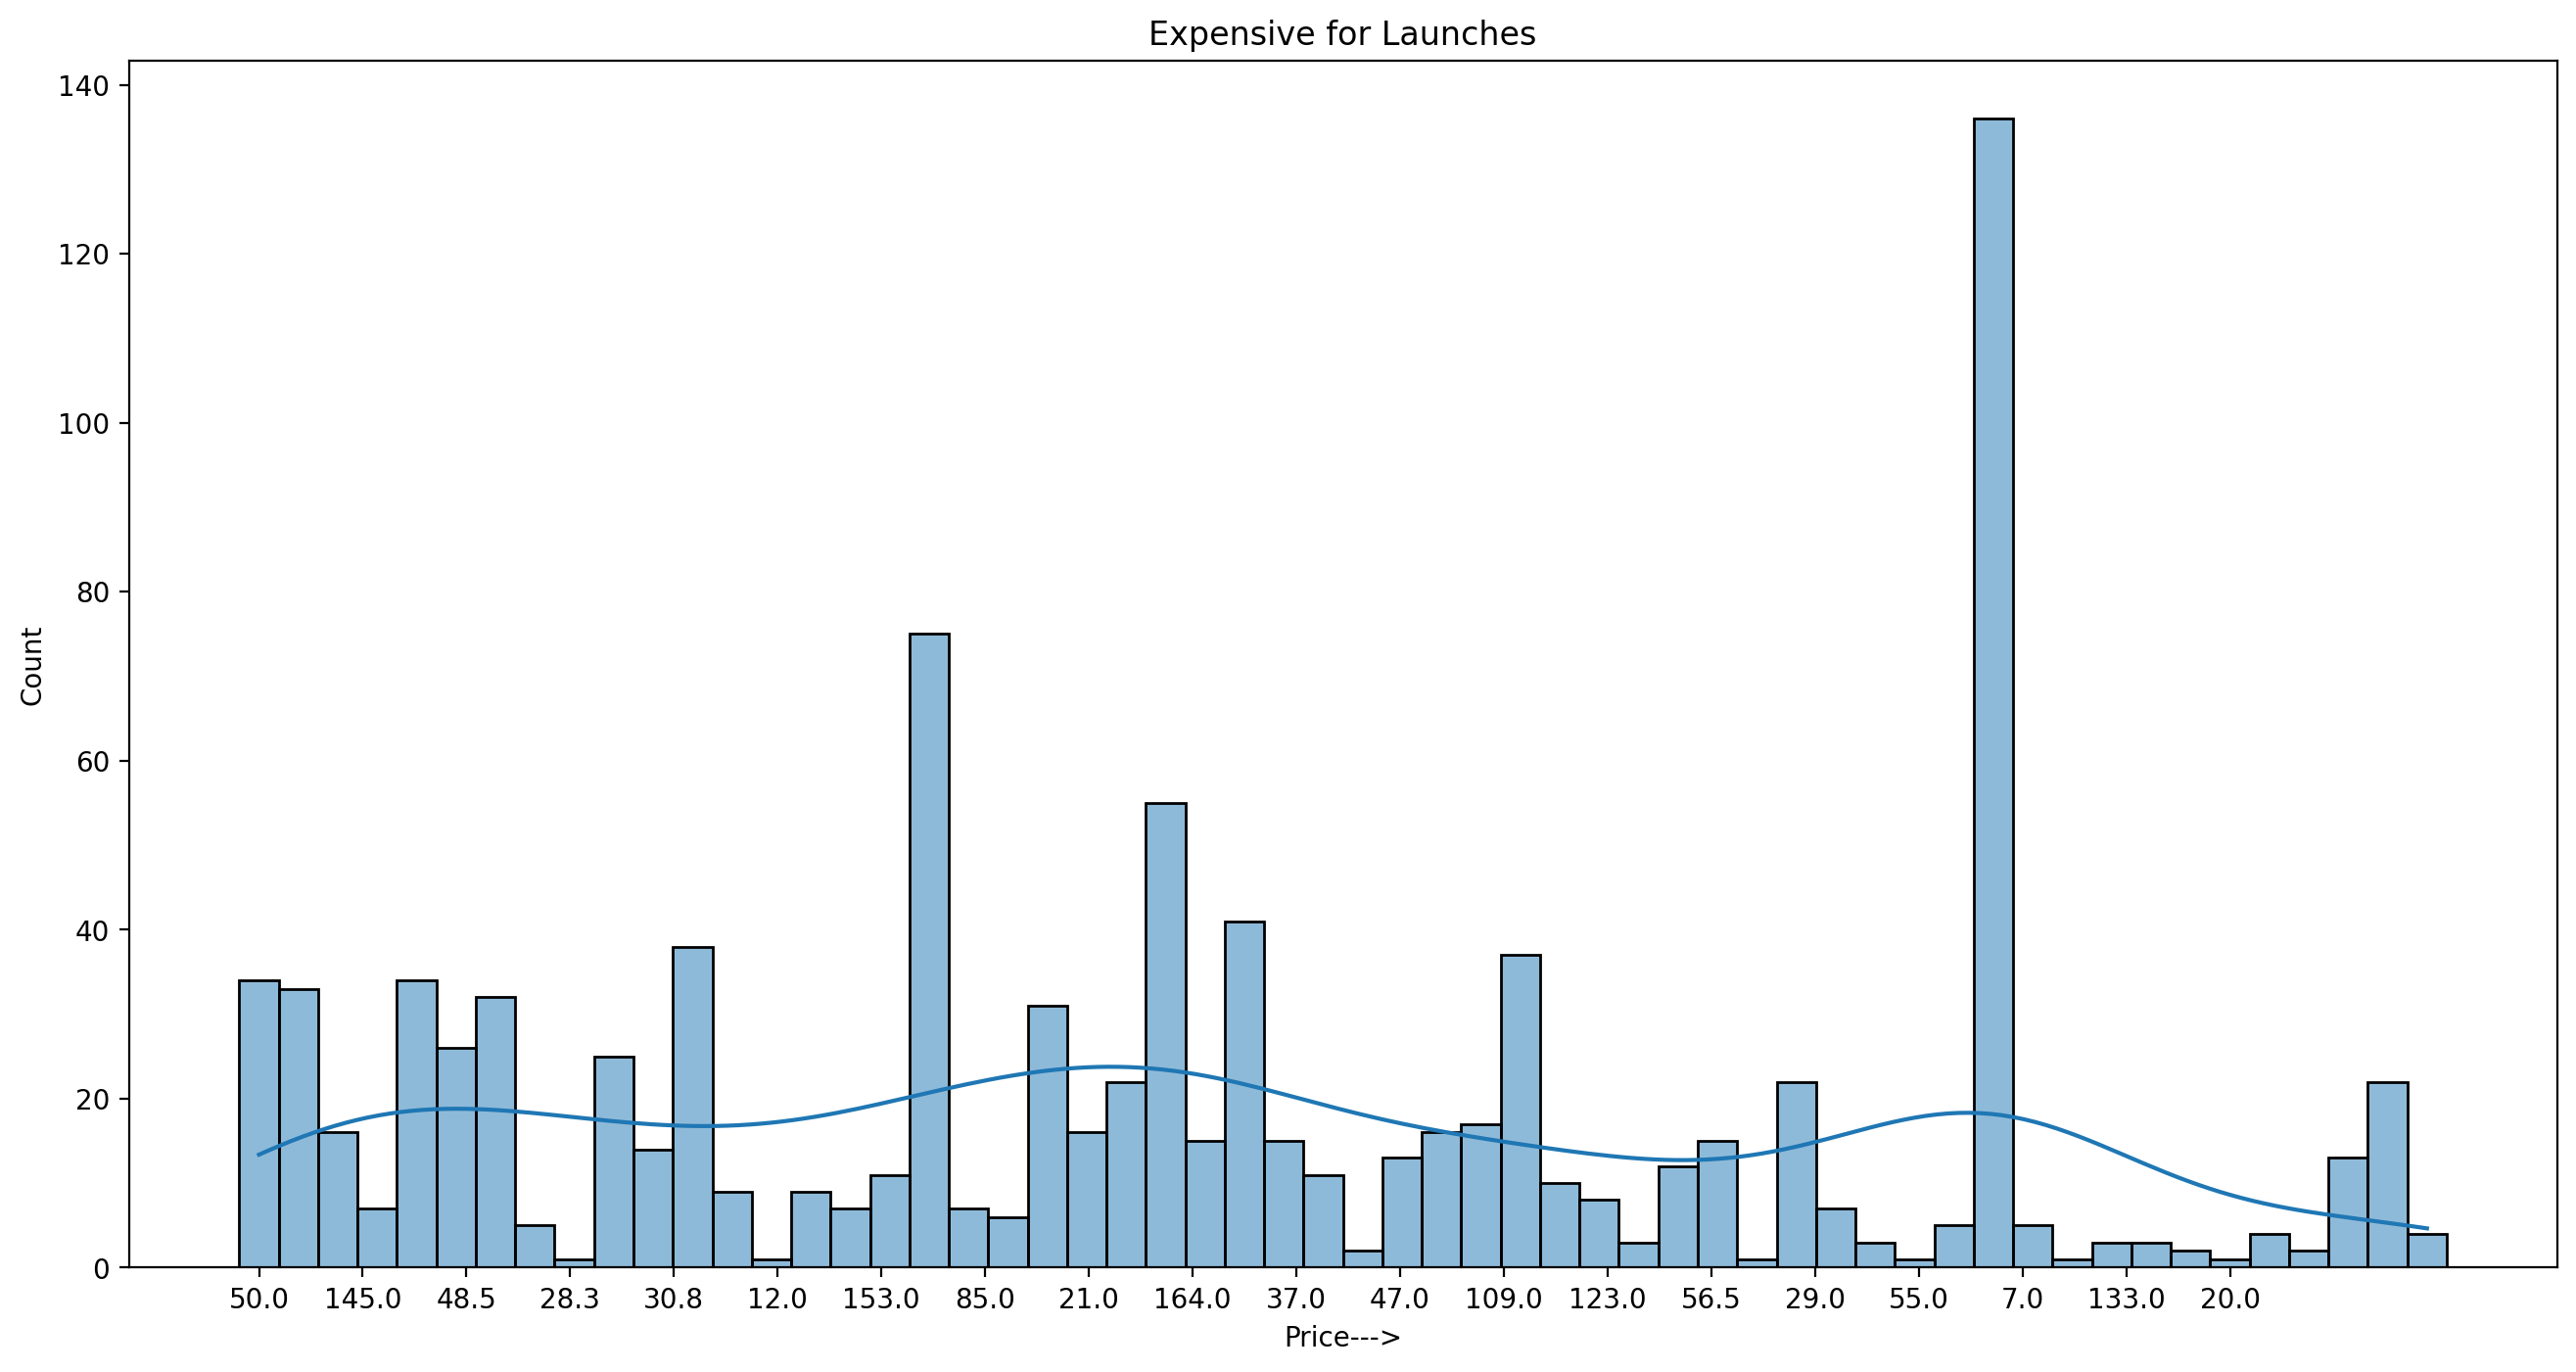

In [ ]:
plt.figure(figsize=(16,8),dpi=200)
# plt.hist(df_data.Price,bins=30,color='skyblue',edgecolor='black')
sns.histplot(df_data,x=df_data.Price,bins=30,kde=True)
plt.xticks(np.linspace(start=0, stop=50, num=20))
plt.xlabel('Price--->')
plt.title("Expensive for Launches")
plt.show()

In [ ]:
expese_=df_data['Price'].value_counts()
expese_

,count
Price,
450.0,136
200.0,75
40.0,55
62.0,41
30.8,38
109.0,37
50.0,34
64.68,34
29.75,33


In [ ]:
plt.figure(figsize=(16,8))
fig=px.histogram(df_data,x='Price',title="Expense of Launch",color=df_data.Price,nbins=10,barmode='overlay',marginal='box')

fig.show()

<Figure size 1600x800 with 0 Axes>

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [7]:
country=dict(df_data['Location'].value_counts())
cc={}
change_={'Iran':'IRAN, ISLAMIC REPUBLIC OF','USA':'UNITED STATES OF AMERICA','Gran Canaria':'UNITED STATES OF AMERICA','New Mexico':'UNITED STATES OF AMERICA',
         'Shahrud Missile Test Site':'Iran','Yellow Sea':'China',
         'Pacific Missile Range Facility':'UNITED STATES OF AMERICA','Barents Sea':'Russian Federation',
         'Yellow Sea':'China','Russia':'Russian Federation','Pacific Ocean':'UNITED STATES OF AMERICA'
         ,'South Korea':'KOREA, REPUBLIC OF','North Korea':'KOREA, REPUBLIC OF'}

for k, v in country.items():
  kk=k.split(', ')[-1]
  if kk in change_:
    if change_[kk] not in cc:
      cc[change_[kk]]=v
    else:
      cc[change_[kk]]+=v
  else:
    if kk not in cc:
      cc[kk]=v
    else:
      cc[kk]+=v

print(cc)

{'Kazakhstan': 701, 'Russian Federation': 1398, 'UNITED STATES OF AMERICA': 1387, 'France': 303, 'Japan': 126, 'China': 269, 'India': 76, 'New Zealand': 13, 'IRAN, ISLAMIC REPUBLIC OF': 13, 'Israel': 11, 'Kenya': 9, 'Australia': 6, 'Brazil': 3, 'KOREA, REPUBLIC OF': 8, 'Iran': 1}


In [8]:
import iso3166
f=iso3166.countries_by_name
f

{'AFGHANISTAN': Country(name='Afghanistan', alpha2='AF', alpha3='AFG', numeric='004', apolitical_name='Afghanistan'),
 'ÅLAND ISLANDS': Country(name='Åland Islands', alpha2='AX', alpha3='ALA', numeric='248', apolitical_name='Åland Islands'),
 'ALBANIA': Country(name='Albania', alpha2='AL', alpha3='ALB', numeric='008', apolitical_name='Albania'),
 'ALGERIA': Country(name='Algeria', alpha2='DZ', alpha3='DZA', numeric='012', apolitical_name='Algeria'),
 'AMERICAN SAMOA': Country(name='American Samoa', alpha2='AS', alpha3='ASM', numeric='016', apolitical_name='American Samoa'),
 'ANDORRA': Country(name='Andorra', alpha2='AD', alpha3='AND', numeric='020', apolitical_name='Andorra'),
 'ANGOLA': Country(name='Angola', alpha2='AO', alpha3='AGO', numeric='024', apolitical_name='Angola'),
 'ANGUILLA': Country(name='Anguilla', alpha2='AI', alpha3='AIA', numeric='660', apolitical_name='Anguilla'),
 'ANTARCTICA': Country(name='Antarctica', alpha2='AQ', alpha3='ATA', numeric='010', apolitical_name='

In [9]:
country_inname=[i.upper() for i in cc]
launch=[v for k,v in cc.items()]
iso=[iso3166.countries_by_name[i].alpha3 for i in country_inname[:-1]]

# for i in country_inname:
#   is_=iso3166.countries_by_name[i].alpha3
print(iso)
# print(colu,ff)
df=pd.DataFrame({'Country':country_inname[:-1],
                 'COUNTS':launch[:-1],
                 'ISO':iso})
df

['KAZ', 'RUS', 'USA', 'FRA', 'JPN', 'CHN', 'IND', 'NZL', 'IRN', 'ISR', 'KEN', 'AUS', 'BRA', 'KOR']


,Country,COUNTS,ISO
0,KAZAKHSTAN,701,KAZ
1,RUSSIAN FEDERATION,1398,RUS
2,UNITED STATES OF AMERICA,1387,USA
3,FRANCE,303,FRA
4,JAPAN,126,JPN
5,CHINA,269,CHN
6,INDIA,76,IND
7,NEW ZEALAND,13,NZL
8,"IRAN, ISLAMIC REPUBLIC OF",13,IRN
9,ISRAEL,11,ISR


In [ ]:
world_map=px.choropleth(df,
                        locations='ISO',
                        color='COUNTS',
                        hover_name='Country',
                        color_continuous_scale='matter')
world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
failure_by_country=df_data[(df_data.Mission_Status=="Failure")].value_counts('Location')
failure_by_country

,count
Location,
"Site 1/5, Baikonur Cosmodrome, Kazakhstan",32
"SLC-1W (75-3-4), Vandenberg AFB, California, USA",9
"Mayak-2, Kapustin Yar, Russia",8
"Site 31/6, Baikonur Cosmodrome, Kazakhstan",8
"LC-18A, Cape Canaveral AFS, Florida, USA",8
...,...
"LC-201, Wenchang Satellite Launch Center, China",1
"LC-18B, Cape Canaveral AFS, Florida, USA",1
"LC-101, Wenchang Satellite Launch Center, China",1


In [ ]:
fc={}
failure_by_country_dict=dict(failure_by_country)
for k, v in failure_by_country_dict.items():
  kk=k.split(', ')[-1]
  # print(kk)
  if kk in change_:
    if change_[kk] not in fc:
      fc[change_[kk]]=v
    else:
      fc[change_[kk]]+=v
  else:
    if kk not in fc:
      fc[kk]=v
    else:
      fc[kk]+=v
print(fc)

{'Kazakhstan': 72, 'UNITED STATES OF AMERICA': 132, 'Russian Federation': 63, 'IRAN, ISLAMIC REPUBLIC OF': 8, 'Japan': 10, 'China': 19, 'India': 8, 'France': 13, 'Australia': 3, 'KOREA, REPUBLIC OF': 5, 'New Zealand': 2, 'Brazil': 2, 'Israel': 2}


In [ ]:
country_inname=[i.upper() for i in fc]
launch=[v for k,v in fc.items()]
iso=[iso3166.countries_by_name[i].alpha3 for i in country_inname]

print(iso)

df_failure=pd.DataFrame({'Country':country_inname,
                 'COUNTS':launch,
                 'ISO':iso})
df_failure

['KAZ', 'USA', 'RUS', 'IRN', 'JPN', 'CHN', 'IND', 'FRA', 'AUS', 'KOR', 'NZL', 'BRA', 'ISR']


,Country,COUNTS,ISO
0,KAZAKHSTAN,72,KAZ
1,UNITED STATES OF AMERICA,132,USA
2,RUSSIAN FEDERATION,63,RUS
3,"IRAN, ISLAMIC REPUBLIC OF",8,IRN
4,JAPAN,10,JPN
5,CHINA,19,CHN
6,INDIA,8,IND
7,FRANCE,13,FRA
8,AUSTRALIA,3,AUS
9,"KOREA, REPUBLIC OF",5,KOR


In [ ]:
world_map=px.choropleth(df_failure,
                        locations='ISO',
                        color='COUNTS',
                        hover_name='Country',
                        color_continuous_scale='matter')
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
country_inname=[i.split(', ')[-1] for i in df_data.Location]
org=[i for i in df_data.Organisation]
mission_status=[i for i in df_data.Mission_Status]

sunburst_df=pd.DataFrame({'Country':country_inname,
                          'Organisation':org,
                          'Mission_Status':mission_status})
sunburst_df

,Country,Organisation,Mission_Status
0,USA,SpaceX,Success
1,China,CASC,Success
2,USA,SpaceX,Success
3,Kazakhstan,Roscosmos,Success
4,USA,ULA,Success
...,...,...,...
4319,USA,US Navy,Failure
4320,USA,AMBA,Success
4321,USA,US Navy,Failure
4322,Kazakhstan,RVSN USSR,Success


In [ ]:
sunburst_chart=px.sunburst(sunburst_df,
                           path=['Country','Organisation','Mission_Status'],
                           values=sunburst_df.index,
                           title="Sunburst Chart of the countries, organisations, and mission status")
sunburst_chart.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [10]:
df_data['Price'].fillna(0,inplace=True)

<ipython-input-10-2963cf3e09c4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_data['Price'].fillna(0,inplace=True)


In [11]:
df_data['Price']=df_data['Price'].astype(str).str.replace(',','')
df_data['Price']=pd.to_numeric(df_data['Price'])

In [12]:
analyse_price_org=df_data[['Organisation',"Price"]].groupby('Organisation',as_index=False).sum().sort_values('Price',ascending=False)
analyse_price_org

,Organisation,Price
35,NASA,"76,280.00"
3,Arianespace,"16,345.00"
48,ULA,"14,798.00"
40,RVSN USSR,"10,000.00"
7,CASC,"6,340.26"
46,SpaceX,"5,444.00"
36,Northrop,"3,930.00"
32,MHI,"3,532.50"
23,ISRO,"2,177.00"
49,US Air Force,"1,550.92"


In [13]:
fig=px.bar(analyse_price_org,x=analyse_price_org.Organisation,y=analyse_price_org.Price,hover_name=analyse_price_org.Organisation,barmode='group')
fig.update_layout(title=" Total Amount of Money Spent by Organisation on Space Missions",
                  xaxis_title='Organisation',
                  yaxis_title='Amount')
fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:

relation_=px.scatter(df_data,x=df_data.Organisation,y=df_data.Price,color=df_data.Organisation,title='Amount of Money Spent by Organisation per Launch')
relation_.show()

# Chart the Number of Launches per Year

In [15]:
mont_nmu={'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09'
,'Oct':10,'Nov':11,'Dec':12}
date_=[]
year_=[]
month_=[]
day_=[]
for i in df_data.Date:
  m,d,y=i.split()[1:4]
  str_=f"{int(y)}-{int(mont_nmu[m])}-{int(d.split(',')[0])}"
  year_.append(int(y))
  month_.append(int(mont_nmu[m]))
  day_.append(int(d.split(',')[0]))
  date_.append(str_)

In [16]:
dd=pd.DataFrame({'Date':date_})
yy=pd.DataFrame({'Year':year_})
df_data.Date=dd.Date
df_data.Date=pd.to_datetime(df_data.Date)
new_df=df_data[['Organisation','Detail',"Price",'Date']]
new_df['Year']=yy.Year

<ipython-input-16-669dc94e800f>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
yy_on_yy=new_df[['Year',"Detail"]].groupby('Year',as_index=False).count()
yy_on_yy

,Year,Detail
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52
...,...,...
59,2016,90
60,2017,92
61,2018,117
62,2019,109


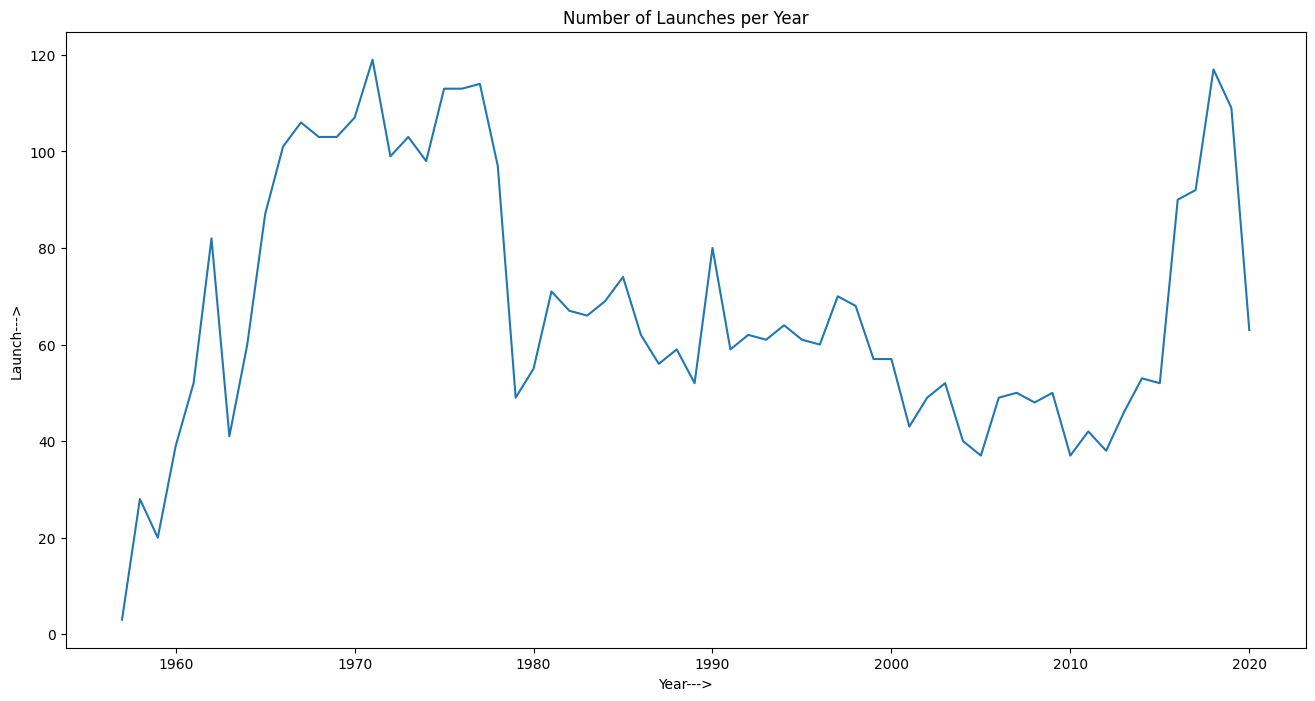

In [ ]:
plt.figure(figsize=(16,8))
plt.xlabel('Year--->')
plt.ylabel('Launch--->')
plt.title('Number of Launches per Year')
plt.plot(yy_on_yy.Year,yy_on_yy.Detail)
plt.show()


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [18]:
month_df=pd.DataFrame({'Month':month_})
month_df=month_df.value_counts('Month')
month_df

,count
Month,
12,450
6,402
4,383
10,381
8,373
9,365
3,353
7,351
2,336


In [19]:
roll_df=month_df.rolling(window=1).mean()
roll_df

,count
Month,
12,450.00
6,402.00
4,383.00
10,381.00
8,373.00
9,365.00
3,353.00
7,351.00
2,336.00


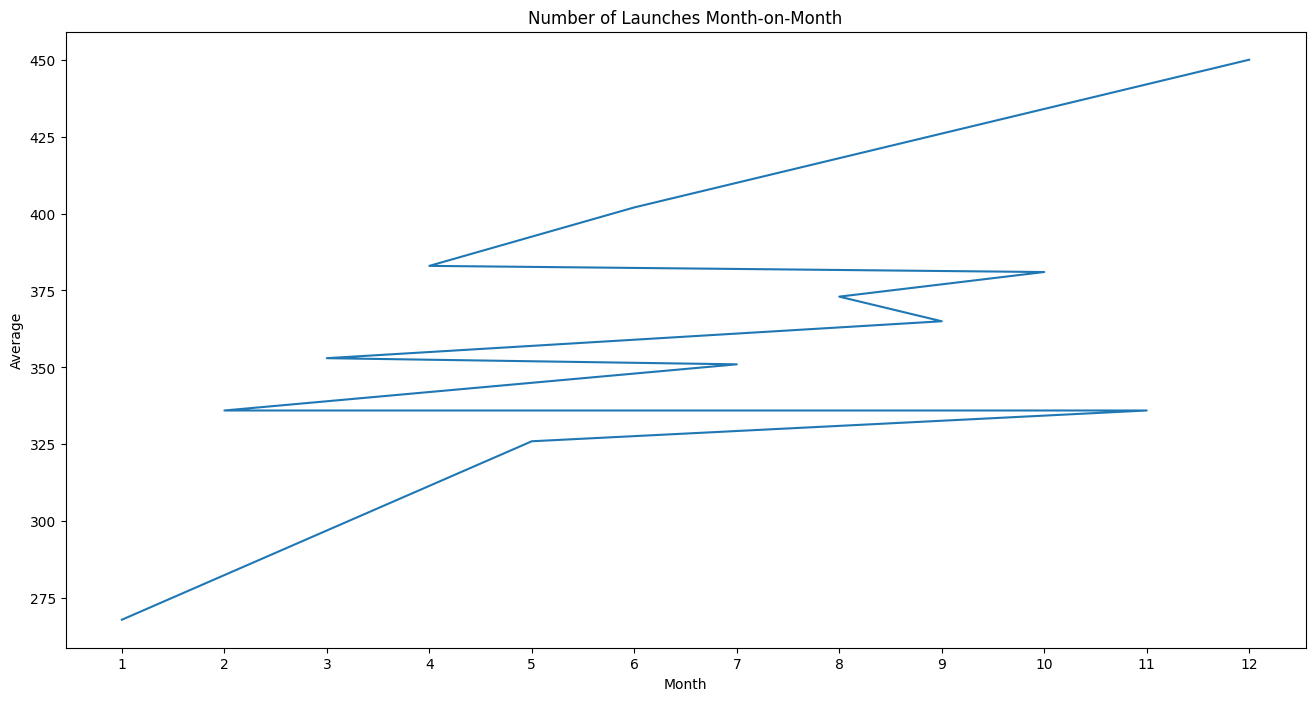

In [20]:
plt.figure(figsize=(16,8))
plt.xlabel('Month')
plt.ylabel('Average')
plt.xticks(np.linspace(start=1, stop=12,num=12))
plt.title('Number of Launches Month-on-Month')
plt.plot(roll_df.index,roll_df.values)
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

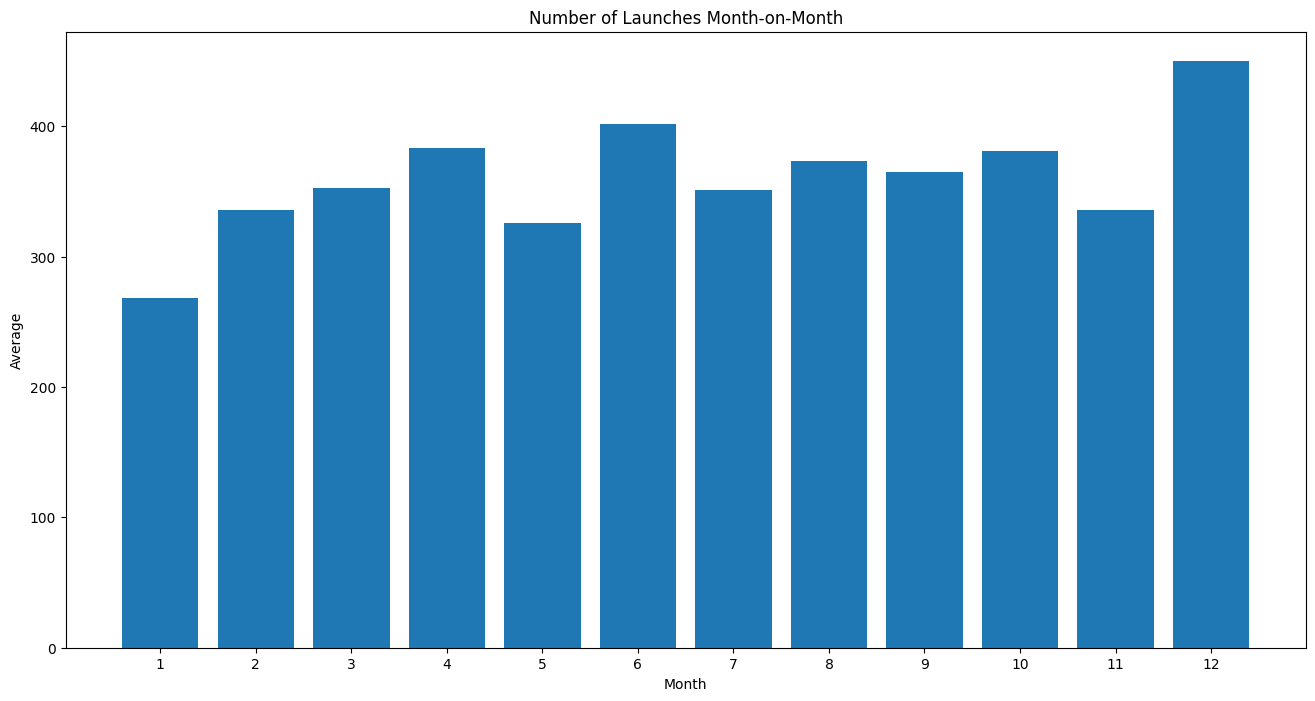

In [ ]:
plt.figure(figsize=(16,8))
plt.xlabel('Month')
plt.ylabel('Average')
plt.xticks(np.linspace(start=1, stop=12,num=12))
plt.title('Number of Launches Month-on-Month')
plt.bar(month_df.index,month_df.values)
plt.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [21]:
df_data['Year']=yy

In [ ]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,Juno I | Explorer 1,StatusRetired,0.00,Success,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,Vanguard | Vanguard TV3,StatusRetired,0.00,Failure,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,1957


In [ ]:
price_over_time=df_data[['Year','Price']].groupby('Year').mean('Price')
price_over_time

,Price
Year,
1957,0.00
1958,0.00
1959,0.00
1960,0.00
1961,0.00
...,...
2016,56.50
2017,49.85
2018,48.70


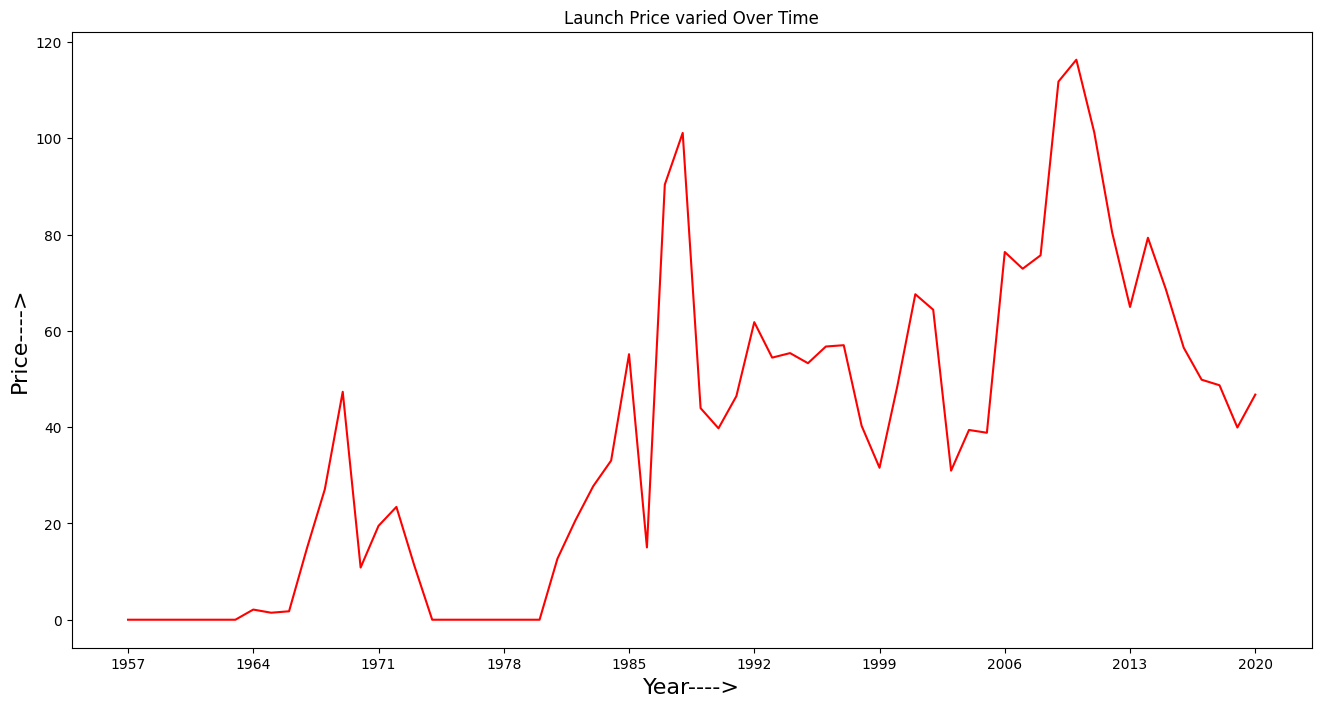

In [ ]:
plt.figure(figsize=(16,8))
plt.xlabel('Year---->',fontsize=16)
plt.ylabel('Price---->',fontsize=16)
plt.xticks(np.linspace(start=1957, stop=2020,num=10))
plt.title('Launch Price varied Over Time')
plt.plot(price_over_time.index,price_over_time.values,color='r')
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [26]:
top_10_org = df_data.groupby('Organisation').size().reset_index(name='Total Launchs').sort_values(by='Total Launchs', ascending=False).iloc[0:10]
top_10_org = top_10_org['Organisation'].to_list()
top_10_org

['RVSN USSR',
 'Arianespace',
 'General Dynamics',
 'CASC',
 'NASA',
 'VKS RF',
 'US Air Force',
 'ULA',
 'Boeing',
 'Martin Marietta']

In [28]:
df_data_org = df_data[df_data['Organisation'].isin(top_10_org)]
df_data_org_grouped = df_data_org.groupby(by=['Organisation', 'Year']).size().reset_index(name='Total Launchs')
df_data_org_grouped

,Organisation,Year,Total Launchs
0,Arianespace,1984,3
1,Arianespace,1985,4
2,Arianespace,1986,3
3,Arianespace,1987,2
4,Arianespace,1988,6
...,...,...,...
318,VKS RF,2016,4
319,VKS RF,2017,6
320,VKS RF,2018,5
321,VKS RF,2019,8


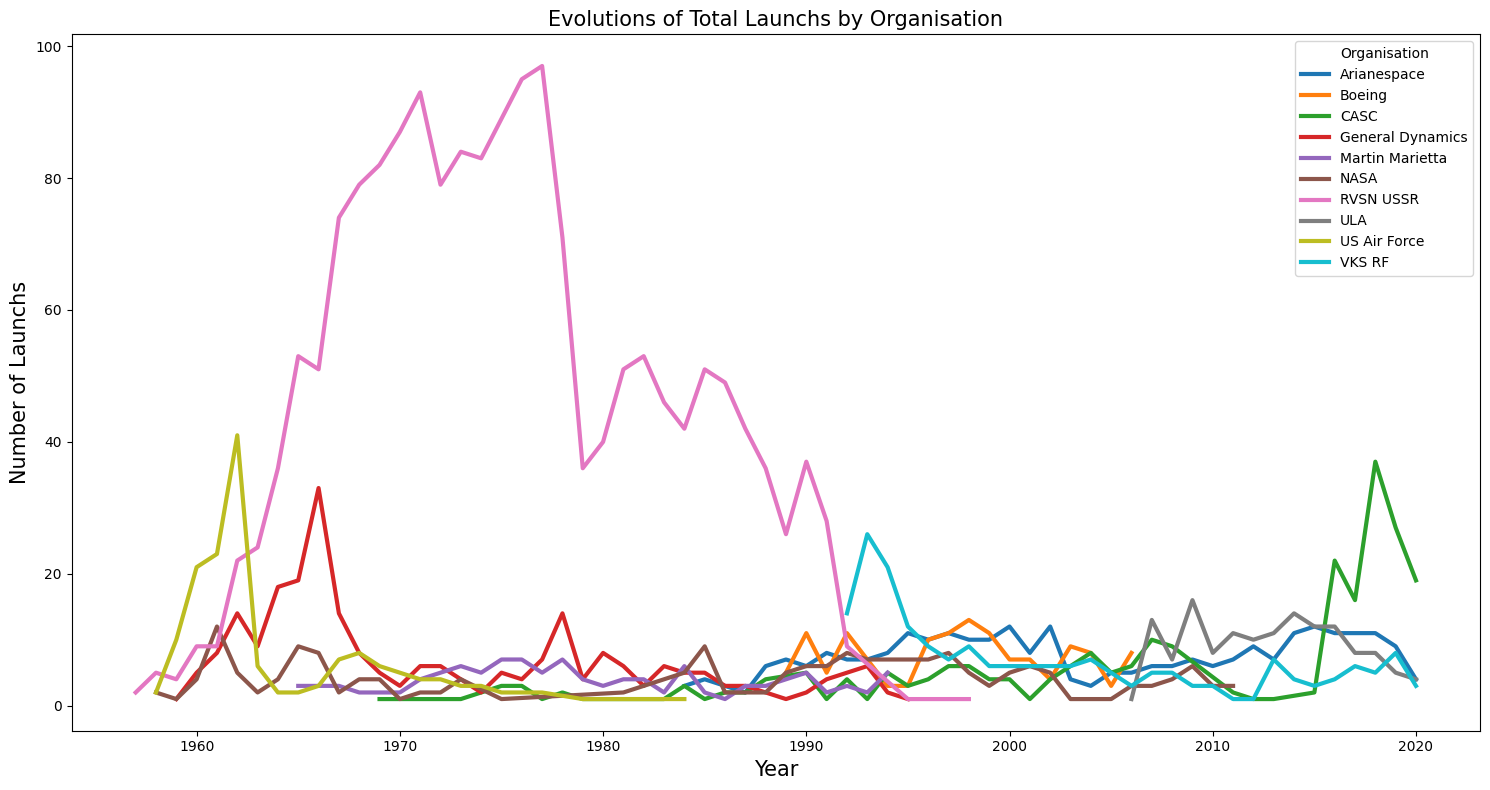

In [30]:
fig = plt.figure(figsize=(15, 8))

plt.title('Evolutions of Total Launchs by Organisation', fontsize=15)

ax = sns.lineplot(data=df_data_org_grouped,
                  x='Year',
                  y='Total Launchs',
                  hue='Organisation',
                  linewidth=3)

ax.set_ylabel('Number of Launchs', fontsize=15)
ax.set_xlabel('Year', fontsize=15)

fig.tight_layout()

plt.show()

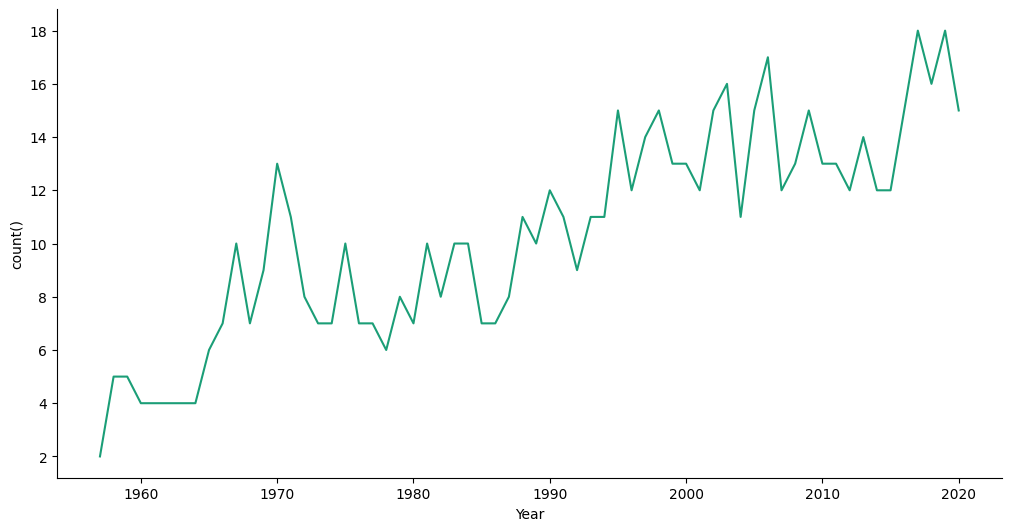

In [ ]:
# @title Year vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = top_10.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [32]:
country=[]
change_={'Iran':'IRAN, ISLAMIC REPUBLIC OF','USA':'UNITED STATES OF AMERICA','Gran Canaria':'UNITED STATES OF AMERICA','New Mexico':'UNITED STATES OF AMERICA',
         'Shahrud Missile Test Site':'Iran','Yellow Sea':'China',
         'Pacific Missile Range Facility':'UNITED STATES OF AMERICA','Barents Sea':'Russian Federation',
         'Yellow Sea':'China','Russia':'Russian Federation','Pacific Ocean':'UNITED STATES OF AMERICA'
         ,'South Korea':'KOREA, REPUBLIC OF','North Korea':'KOREA, REPUBLIC OF'}
for i in df_data['Location']:
  if i.split(', ')[-1] in change_:
    print(i.split(', ')[-1],'--->',change_[i.split(', ')[-1]])
    country.append(change_[i.split(', ')[-1]])
  else:
    country.append(i.split(', ')[-1])



country_df=pd.DataFrame({'Country':country})
country_df
df_data['Country']=country_df.Country
df_data

USA ---> UNITED STATES OF AMERICA
USA ---> UNITED STATES OF AMERICA
USA ---> UNITED STATES OF AMERICA
USA ---> UNITED STATES OF AMERICA
USA ---> UNITED STATES OF AMERICA
USA ---> UNITED STATES OF AMERICA
USA ---> UNITED STATES OF AMERICA
USA ---> UNITED STATES OF AMERICA
USA ---> UNITED STATES OF AMERICA
USA ---> UNITED STATES OF AMERICA
Russia ---> Russian Federation
USA ---> UNITED STATES OF AMERICA
USA ---> UNITED STATES OF AMERICA
Shahrud Missile Test Site ---> Iran
USA ---> UNITED STATES OF AMERICA
USA ---> UNITED STATES OF AMERICA
Russia ---> Russian Federation
USA ---> UNITED STATES OF AMERICA
Russia ---> Russian Federation
USA ---> UNITED STATES OF AMERICA
USA ---> UNITED STATES OF AMERICA
USA ---> UNITED STATES OF AMERICA
Iran ---> IRAN, ISLAMIC REPUBLIC OF
USA ---> UNITED STATES OF AMERICA
USA ---> UNITED STATES OF AMERICA
USA ---> UNITED STATES OF AMERICA
Russia ---> Russian Federation
USA ---> UNITED STATES OF AMERICA
USA ---> UNITED STATES OF AMERICA
USA ---> UNITED STATES

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,UNITED STATES OF AMERICA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,2020,UNITED STATES OF AMERICA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020,UNITED STATES OF AMERICA
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,1958,UNITED STATES OF AMERICA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,Juno I | Explorer 1,StatusRetired,0.00,Success,1958,UNITED STATES OF AMERICA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,Vanguard | Vanguard TV3,StatusRetired,0.00,Failure,1957,UNITED STATES OF AMERICA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,1957,Kazakhstan


In [33]:
usa_russia_df=df_data[(df_data.Country=='UNITED STATES OF AMERICA') | (df_data.Country=='USA')|(df_data.Country=='Russian Federation') | (df_data.Country=='Russia')|(df_data.Country=='Kazakhstan')]
usa_russia_df=usa_russia_df.replace('Kazakhstan','Russian Federation')
usa_russia_df

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,UNITED STATES OF AMERICA
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,2020,UNITED STATES OF AMERICA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,Russian Federation
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020,UNITED STATES OF AMERICA
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-07-23,Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success,2020,Russian Federation
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,1958,UNITED STATES OF AMERICA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,Juno I | Explorer 1,StatusRetired,0.00,Success,1958,UNITED STATES OF AMERICA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,Vanguard | Vanguard TV3,StatusRetired,0.00,Failure,1957,UNITED STATES OF AMERICA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,1957,Russian Federation


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [34]:
count_=usa_russia_df.value_counts('Country')

In [ ]:
fig=px.pie(labels=count_.index,
           values=count_.values,
           hover_name=count_.index)
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [35]:
year_on_year=usa_russia_df[['Year','Country','Detail']].groupby(['Year','Country'],as_index=False).count()

In [ ]:
bar_=px.bar(x=year_on_year.Year,
            y=year_on_year.Detail,
            color=year_on_year.Country,
            title='Total Number of Launches Year-On-Year by the Two Superpowers')
bar_.update_layout(xaxis_title='Year--->',
                   yaxis_title='Launches--->')
bar_.show()

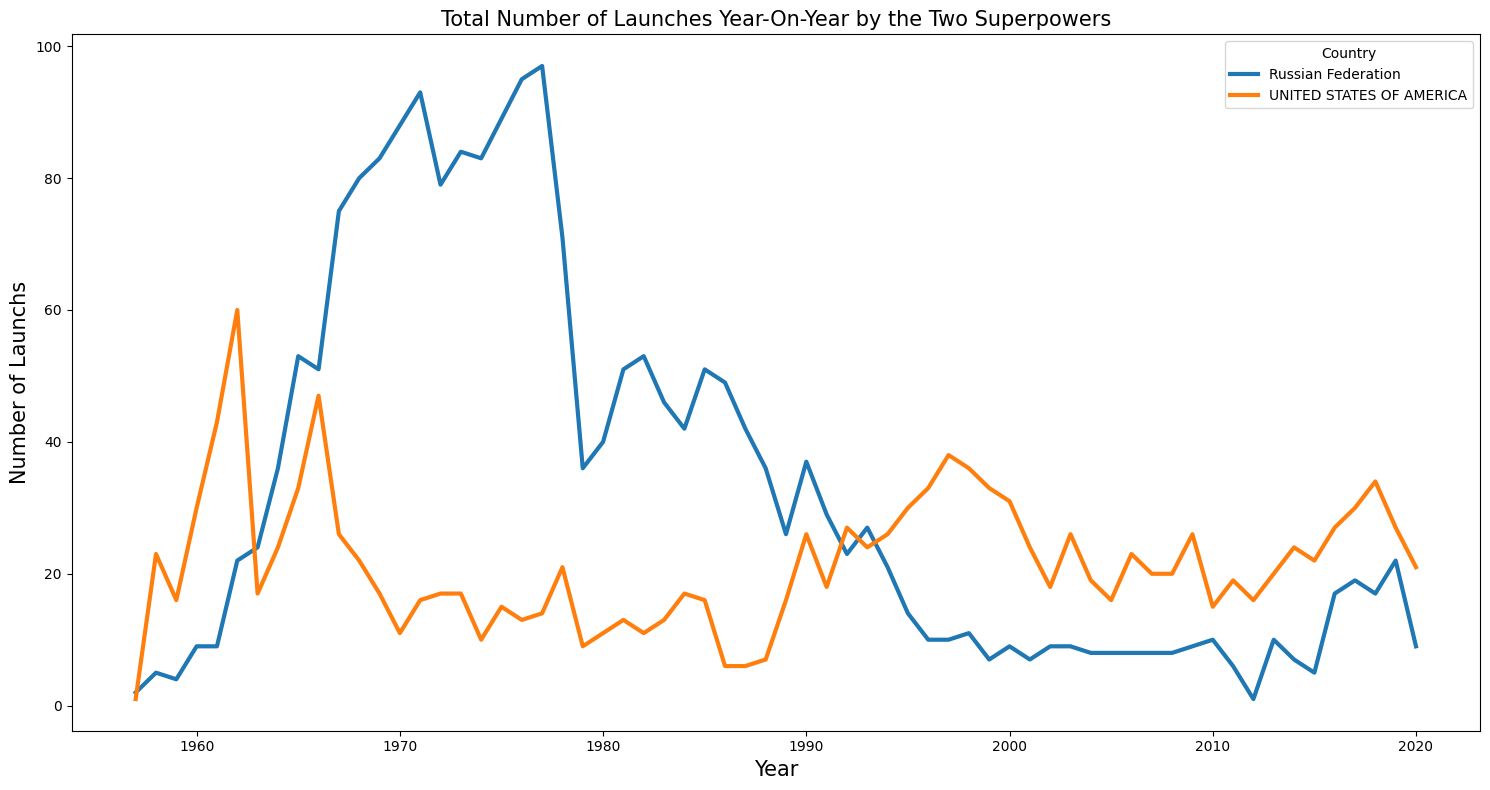

In [36]:
fig = plt.figure(figsize=(15, 8))

plt.title('Total Number of Launches Year-On-Year by the Two Superpowers', fontsize=15)

ax = sns.lineplot(data=year_on_year,
                  x='Year',
                  y='Detail',
                  hue='Country',
                  linewidth=3)

ax.set_ylabel('Number of Launchs', fontsize=15)
ax.set_xlabel('Year', fontsize=15)

fig.tight_layout()

plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [38]:
year_on_year_fail=usa_russia_df[['Year','Country','Mission_Status','Detail']].groupby(['Year','Country','Mission_Status'],as_index=False).count()
year_on_year_fail=year_on_year_fail[year_on_year_fail.Mission_Status=='Failure']
year_on_year_fail

,Year,Country,Mission_Status,Detail
1,1957,UNITED STATES OF AMERICA,Failure,1
2,1958,Russian Federation,Failure,4
4,1958,UNITED STATES OF AMERICA,Failure,16
7,1959,Russian Federation,Failure,1
10,1959,UNITED STATES OF AMERICA,Failure,8
...,...,...,...,...
249,2016,Russian Federation,Failure,1
253,2017,Russian Federation,Failure,1
257,2018,Russian Federation,Failure,1
262,2019,UNITED STATES OF AMERICA,Failure,1


In [ ]:
bar_=px.bar(x=year_on_year_fail.Year,
            y=year_on_year_fail.Detail,
            color=year_on_year_fail.Country,
            title='Total Number of Mission Failures Year on Year')
bar_.update_layout(xaxis_title='Year--->',
                   yaxis_title='Failures--->')
bar_.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [39]:
failures=year_on_year_fail.rolling(window=1).mean('Detail')

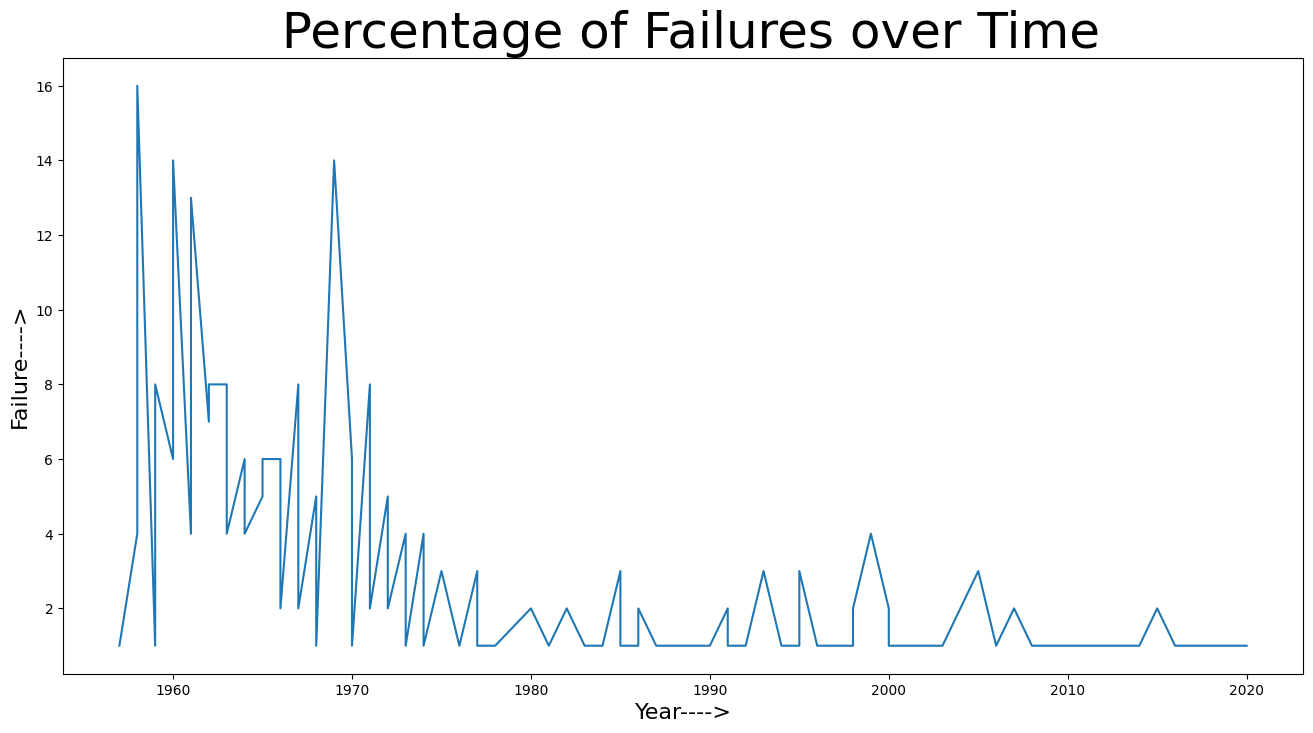

In [ ]:
plt.figure(figsize=(16,8))
plt.xlabel('Year---->',fontsize=16)
plt.ylabel('Failure---->',fontsize=16)

plt.title(' Percentage of Failures over Time',fontsize=36)
plt.plot(failures.Year,failures.Detail)
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [41]:
year_on_year=df_data[['Year','Country','Detail']].groupby(['Year','Country'],as_index=False).count()
year_on_year

,Year,Country,Detail
0,1957,Kazakhstan,2
1,1957,UNITED STATES OF AMERICA,1
2,1958,Kazakhstan,5
3,1958,UNITED STATES OF AMERICA,23
4,1959,Kazakhstan,4
...,...,...,...
407,2020,Japan,3
408,2020,Kazakhstan,6
409,2020,New Zealand,3
410,2020,Russian Federation,3


<ipython-input-44-12c43bf698e1>:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



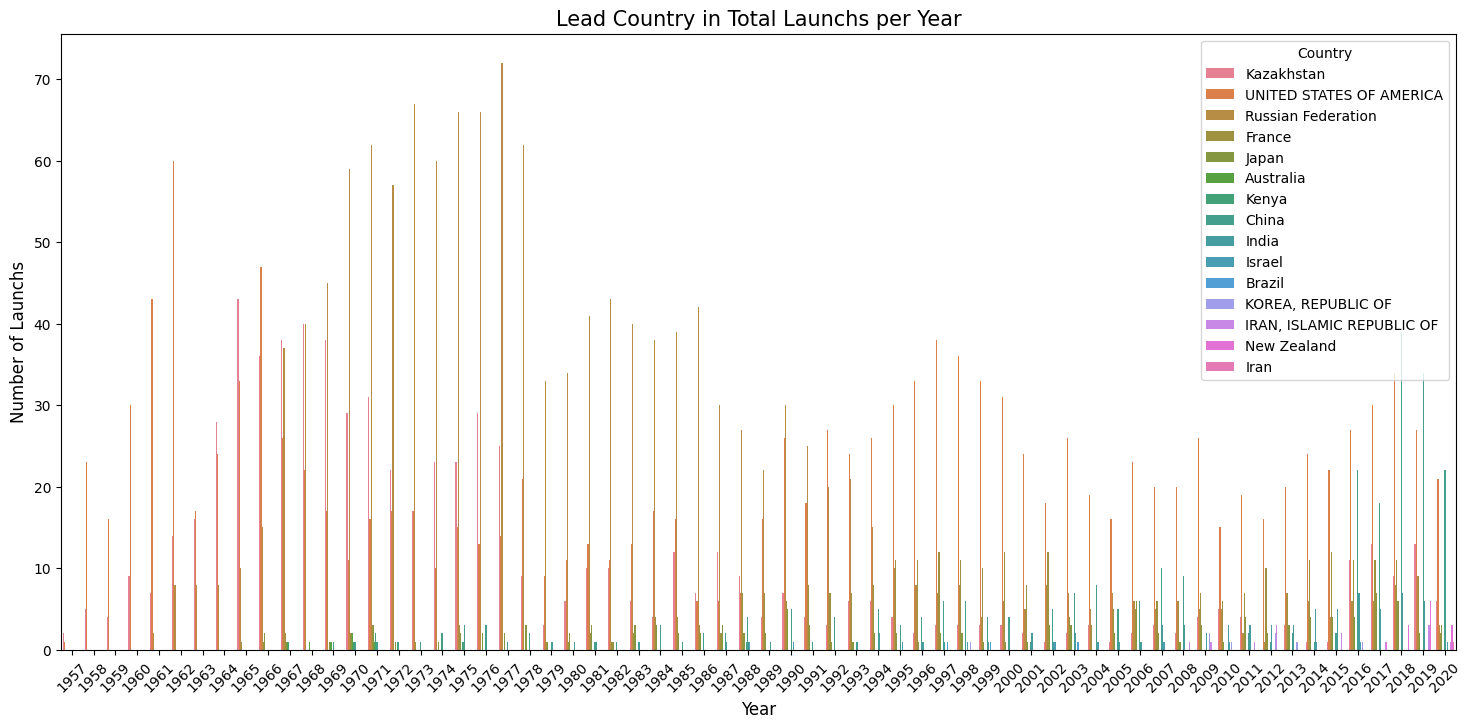

In [44]:
fig = plt.figure(figsize=(18, 8))

plt.title('Lead Country in Total Launchs per Year', fontsize=15)

ax = sns.barplot(data=year_on_year,
            x='Year',
            y='Detail',
            hue='Country')

ax.set_ylabel('Number of Launchs', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

In [43]:
bar_=px.bar(x=year_on_year.Year,
            y=year_on_year.Detail,
            color=year_on_year.Country,
            title='Total Number of Launches Year-On-Year by the Two Superpowers')
bar_.update_layout(xaxis_title='Year--->',
                   yaxis_title='Launches--->')
bar_.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [ ]:
year_on_year=df_data[['Year','Organisation','Detail']].groupby(['Year','Organisation'],as_index=False).count()
year_on_year

,Year,Organisation,Detail
0,1957,RVSN USSR,2
1,1957,US Navy,1
2,1958,AMBA,7
3,1958,NASA,2
4,1958,RVSN USSR,5
...,...,...,...
658,2020,Roscosmos,4
659,2020,SpaceX,14
660,2020,ULA,4
661,2020,VKS RF,3


In [ ]:
bar_=px.bar(x=year_on_year.Year,
            y=year_on_year.Detail,
            color=year_on_year.Organisation,
            title='Total Number of Launches Year-On-Year by the Two Superpowers')
bar_.update_layout(xaxis_title='Year--->',
                   yaxis_title='Launches--->')
bar_.show()